In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests as rq
from config import weather_api_key

#Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [3]:
from citipy import citipy

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combo.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

623

In [5]:
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create the counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(3)
        
    #Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve the data.
        city_weather = rq.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d  %H-%M-%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate the Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | lata
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | kutum
Processing Record 5 of Set 1 | clyde river
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | acajutla
Processing Record 9 of Set 1 | caravelas
Processing Record 10 of Set 1 | provideniya
Processing Record 11 of Set 1 | guerrero negro
Processing Record 12 of Set 1 | dunedin
Processing Record 13 of Set 1 | graham
Processing Record 14 of Set 1 | dikson
Processing Record 15 of Set 1 | oktyabrskiy
Processing Record 16 of Set 1 | cherskiy
Processing Record 17 of Set 1 | castro
Processing Record 18 of Set 1 | tres barras
Processing Record 19 of Set 1 | rawson
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | jamestown
Processing Record 23 of Set 1 | mahebourg
Proce

Processing Record 38 of Set 4 | ribeira grande
Processing Record 39 of Set 4 | pouembout
Processing Record 40 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 41 of Set 4 | iqaluit
Processing Record 42 of Set 4 | methoni
Processing Record 43 of Set 4 | correntina
Processing Record 44 of Set 4 | port lincoln
Processing Record 45 of Set 4 | shieli
Processing Record 46 of Set 4 | mutoko
Processing Record 47 of Set 4 | yumen
Processing Record 48 of Set 4 | airai
Processing Record 49 of Set 4 | keflavik
Processing Record 50 of Set 4 | solsvik
City not found. Skipping...
Processing Record 1 of Set 5 | bonthe
Processing Record 2 of Set 5 | bijar
Processing Record 3 of Set 5 | hilton head island
Processing Record 4 of Set 5 | altensteig
Processing Record 5 of Set 5 | ponta do sol
Processing Record 6 of Set 5 | talnakh
Processing Record 7 of Set 5 | batagay
Processing Record 8 of Set 5 | sao filipe
Processing Record 9 of Set 5 | lorengau
Processing Record 10 of Se

Processing Record 26 of Set 8 | shestakovo
Processing Record 27 of Set 8 | bom jardim
Processing Record 28 of Set 8 | lompoc
Processing Record 29 of Set 8 | verkh-usugli
Processing Record 30 of Set 8 | castro verde
Processing Record 31 of Set 8 | port moresby
Processing Record 32 of Set 8 | guanare
Processing Record 33 of Set 8 | mitu
Processing Record 34 of Set 8 | marathopolis
City not found. Skipping...
Processing Record 35 of Set 8 | issenye
Processing Record 36 of Set 8 | challans
Processing Record 37 of Set 8 | benjamin constant
Processing Record 38 of Set 8 | maunabo
Processing Record 39 of Set 8 | karauzyak
City not found. Skipping...
Processing Record 40 of Set 8 | tezu
Processing Record 41 of Set 8 | laviana
Processing Record 42 of Set 8 | bonavista
Processing Record 43 of Set 8 | emerald
Processing Record 44 of Set 8 | athabasca
Processing Record 45 of Set 8 | glencoe
Processing Record 46 of Set 8 | saveh
Processing Record 47 of Set 8 | tarudant
City not found. Skipping...
P

Processing Record 15 of Set 12 | chivolo
Processing Record 16 of Set 12 | mata
Processing Record 17 of Set 12 | kangaatsiaq
Processing Record 18 of Set 12 | ginda
Processing Record 19 of Set 12 | uruzgan
Processing Record 20 of Set 12 | inhambane
Processing Record 21 of Set 12 | dianopolis
City not found. Skipping...
Processing Record 22 of Set 12 | labutta
City not found. Skipping...
Processing Record 23 of Set 12 | presidente bernardes
Processing Record 24 of Set 12 | bumba
Processing Record 25 of Set 12 | isangel
Processing Record 26 of Set 12 | egvekinot
Processing Record 27 of Set 12 | la palma
Processing Record 28 of Set 12 | kemijarvi
Processing Record 29 of Set 12 | sinnamary
Processing Record 30 of Set 12 | fallon
Processing Record 31 of Set 12 | litoral del san juan
City not found. Skipping...
Processing Record 32 of Set 12 | kysyl-syr
Processing Record 33 of Set 12 | itoman
Processing Record 34 of Set 12 | totness
Processing Record 35 of Set 12 | thinadhoo
Processing Record 

In [7]:
len(city_data)

571

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[city_data_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2022-09-07 23-43-18,-33.6500,115.3333,50.94,78,89,6.69
1,Lata,PT,2022-09-07 23-43-19,40.1629,-8.3327,68.07,86,97,1.97
2,Albany,US,2022-09-07 23-39-04,42.6001,-73.9662,66.88,88,97,1.66
3,Kutum,SD,2022-09-07 23-38-50,14.2000,24.6667,71.62,69,99,8.30
4,Clyde River,CA,2022-09-07 23-43-20,70.4692,-68.5914,35.83,100,100,17.27
5,Kapaa,US,2022-09-07 23-38-23,22.0752,-159.3190,84.09,73,75,11.99
6,Rikitea,PF,2022-09-07 23-43-20,-23.1203,-134.9692,72.68,72,4,23.82
7,Acajutla,SV,2022-09-07 23-43-21,13.5928,-89.8275,81.28,82,56,4.74
8,Caravelas,BR,2022-09-07 23-43-21,-17.7125,-39.2481,68.50,72,100,6.46
9,Provideniya,RU,2022-09-07 23-43-22,64.3833,-173.3000,50.36,76,75,13.42


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

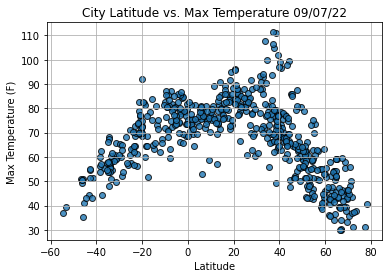

In [13]:
# Import time module (Done at top).

# Build the scatter plot for latittude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

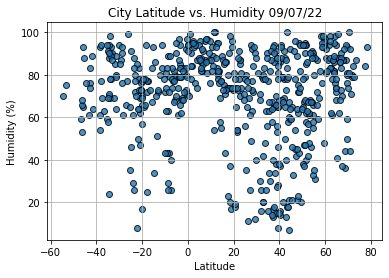

In [14]:
# Import time module (Done at top).

# Build the scatter plot for latittude vs. max temperature.
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

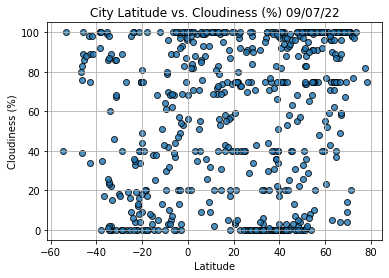

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

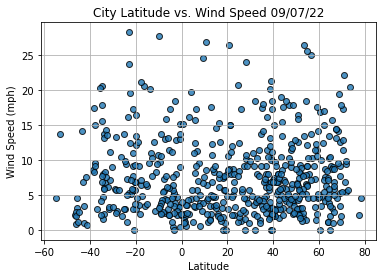

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()